# STFT feature extraction
Using stft with 0.032s samples

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import librosa.display
import tensorflow as tf
%matplotlib inline

tf.random.set_seed(100)

In [20]:
librosa.get_samplerate("../AS/New_AS_002.wav")
# return: 8000
# Thus, n_fft should be 256 as 1/8000 * 256 = 0.032

8000

In [21]:
AS = np.array([librosa.load(os.path.join("../AS", filename), sr=None)[0] for filename in sorted(os.listdir("../AS"))], dtype=object)
MR = np.array([librosa.load(os.path.join("../MR", filename), sr=None)[0] for filename in sorted(os.listdir("../MR"))], dtype=object)
MS = np.array([librosa.load(os.path.join("../MS", filename), sr=None)[0] for filename in sorted(os.listdir("../MS"))], dtype=object)
MVP = np.array([librosa.load(os.path.join("../MVP", filename), sr=None)[0] for filename in sorted(os.listdir("../MVP"))], dtype=object)
N = np.array([librosa.load(os.path.join("../N", filename), sr=None)[0] for filename in sorted(os.listdir("../N"))], dtype=object)

sr = librosa.load(os.path.join("../AS", os.listdir("../AS")[15]), sr=None)[1]

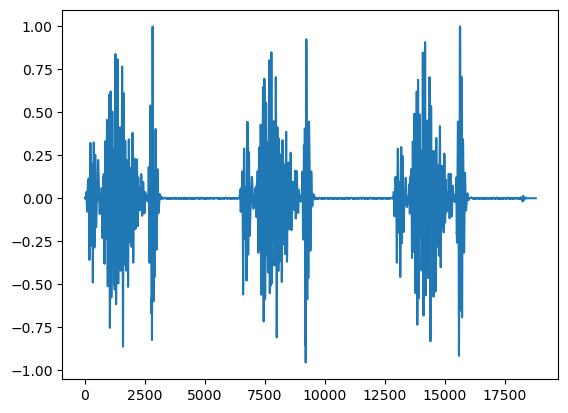

In [24]:
plt.plot(AS[188])

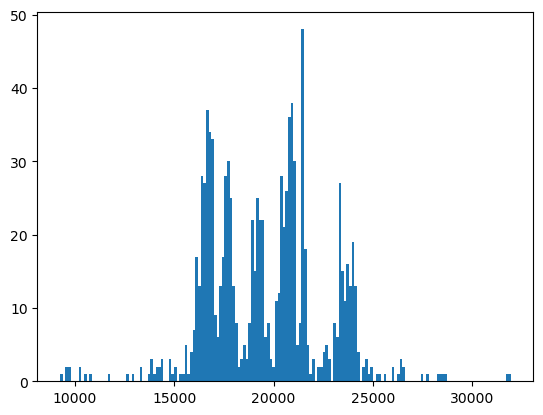

In [11]:
length = [len(x) for x in AS]
length += [len(x) for x in MR]
length += [len(x) for x in MS]
length += [len(x) for x in MVP]
length += [len(x) for x in N]

plt.hist(length, bins=170)
plt.show()

In [12]:
MAXLEN = 27500
def pad_sequence(x, maxlen=MAXLEN):
    return tf.keras.utils.pad_sequences(sequences=x, maxlen=MAXLEN,
                                       dtype='float32', padding='post',
                                       truncating='post')

In [13]:
AS = pad_sequence(AS)
MR = pad_sequence(MR)
MS = pad_sequence(MS)
MVP = pad_sequence(MVP)
N = pad_sequence(N)

In [14]:
AS = abs(np.swapaxes(librosa.stft(AS, n_fft=257), 1, 2))
MR = abs(np.swapaxes(librosa.stft(MR, n_fft=257), 1, 2))
MS = abs(np.swapaxes(librosa.stft(MS, n_fft=257), 1, 2))
MVP = abs(np.swapaxes(librosa.stft(MVP, n_fft=257), 1, 2))
N = abs(np.swapaxes(librosa.stft(N, n_fft=257), 1, 2))

In [15]:
# shuffle
AS = np.array(tf.random.shuffle(AS))
MR = np.array(tf.random.shuffle(MR))
MS = np.array(tf.random.shuffle(MS))
MVP = np.array(tf.random.shuffle(MVP))
N = np.array(tf.random.shuffle(N))

Metal device set to: Apple M2 Pro


2024-01-03 08:05:07.880406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-03 08:05:07.880597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
AS.shape

(200, 430, 129)

In [17]:
X = np.concatenate((AS, MR, MS, MVP, N))
Y = np.concatenate((np.zeros(200), np.ones(200), 2*np.ones(200), 3*np.ones(200), 4*np.ones(200)))

X_new = np.ones((1, 430, 129))
Y_new = np.ones(1)
for i in range(200):
    X_tmp = np.array([X[i], X[200+i], X[400+i], X[600+i], X[800+i]], dtype=np.float32)
    Y_tmp = np.array([Y[i], Y[200+i], Y[400+i], Y[600+i], Y[800+i]], dtype=int)
    X_new = np.concatenate((X_new, X_tmp))
    Y_new = np.concatenate((Y_new, Y_tmp))
    
X_new = np.array(X_new[1:], dtype=np.float32)
Y_new = np.array(Y_new[1:], dtype=int)

In [18]:
np.savez("stft.npz", X=X_new, Y=Y_new)